# SIESTA 2019, IJM Changes, Plots

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [242]:
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

In [2]:
%load_ext sql
%config SqlMagic.autocommit=False
%config SqlMagic.autopandas=True

In [3]:
pd.set_option('display.max_colwidth', 100)

In [4]:
%sql postgresql://mpinzger@localhost:5432/retrofit

'Connected: mpinzger@retrofit'

## Get changes of commit over all modules

In [5]:
%%sql changes_per_commit << SELECT co.*, f.filename, c.change_type, c.action 
FROM change_schema.changes c JOIN change_schema.filerevision f ON c.filerevision_id = f.id
JOIN change_schema.commit co ON f.revision_id = co.id;

 * postgresql://mpinzger@localhost:5432/retrofit
110266 rows affected.
Returning data to local variable changes_per_commit


In [52]:
#changes_per_commit.head(3)

In [34]:
result = changes_per_commit.groupby(['commit_dst', 'timestamp']).agg({
    'action' : 'count'
})

In [40]:
result.sort_values('timestamp', inplace=True)

In [35]:
#changes_per_commit[changes_per_commit[timestamp]]

In [51]:
result.head(3)

,,action
commit_dst,timestamp,
d8fab22ab289f24caf73e2af9d486b92afdad490,2012-03-26 15:38:09,6150
82b27f3f041c79736c4933049247b429b467af16,2012-05-02 00:12:02,161
704f59d935be053855e1ddc778f734ddaec29097,2012-05-18 01:42:13,38


## Plot per commit, sorted by timestamp

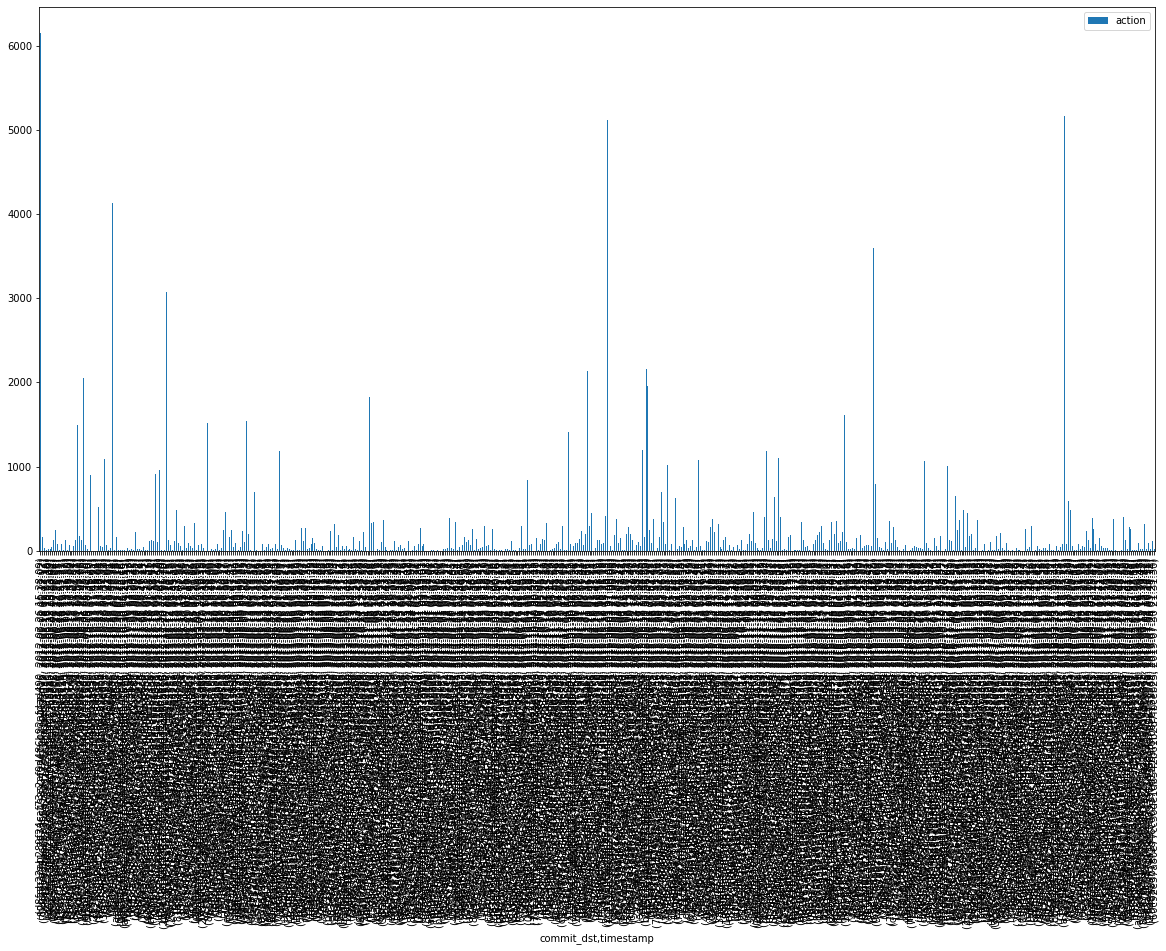

In [50]:
#t.plot.bar(figsize=(20,10))
result.plot.bar(figsize=(20,10))

## Add year and month of each change action

In [59]:
changes_per_commit['year-month'] = changes_per_commit.timestamp.map(lambda x: x.strftime('%Y-%m'))

In [60]:
changes_per_commit.head(3)

,id,project_id,commit_src,commit_dst,commit_msg,timestamp,filename,change_type,action,year-month
106084,40936,38,b0241b3d3636ca695e86fcb3d0189e157ec20ee6,d8fab22ab289f24caf73e2af9d486b92afdad490,Mavenize.\n,2012-03-26 15:38:09,http/src/main/java/retrofit/http/HttpRequestBuilder.java,Statement,INS,2012-03
4981,4772,5,b0241b3d3636ca695e86fcb3d0189e157ec20ee6,d8fab22ab289f24caf73e2af9d486b92afdad490,Mavenize.\n,2012-03-26 15:38:09,android/src/main/java/retrofit/io/QueueFile.java,Argument,INS,2012-03
4990,4772,5,b0241b3d3636ca695e86fcb3d0189e157ec20ee6,d8fab22ab289f24caf73e2af9d486b92afdad490,Mavenize.\n,2012-03-26 15:38:09,android/src/main/java/retrofit/io/QueueFile.java,Statement,INS,2012-03


In [304]:
result = changes_per_commit.groupby(['year-month']).agg({
    'action' : 'count'
})

## Plot actions per month

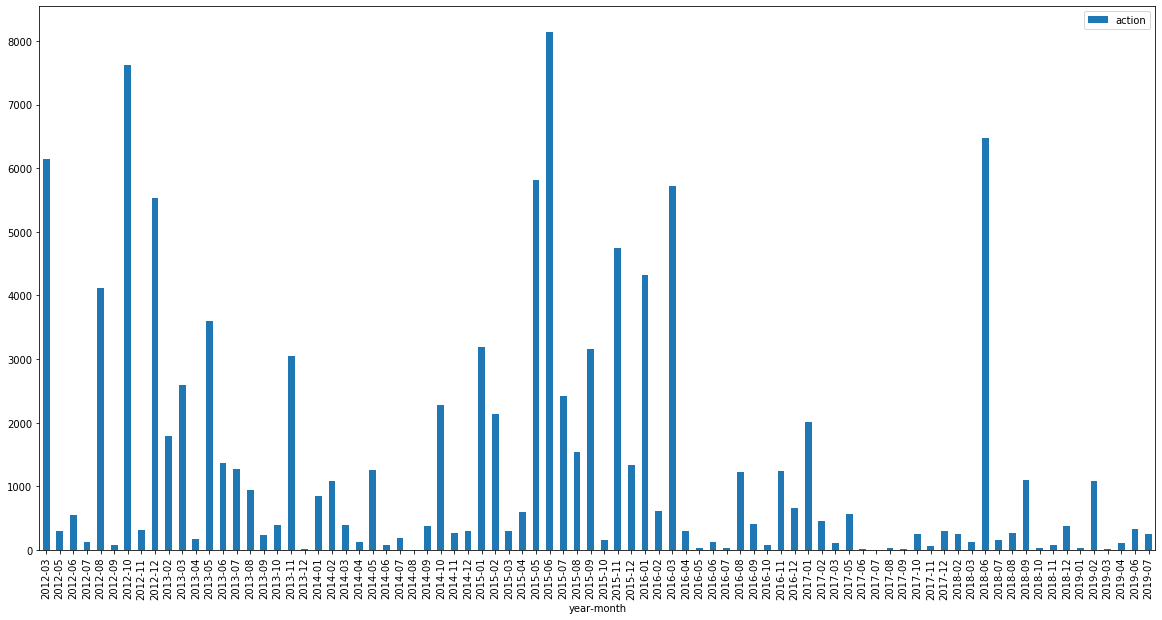

In [305]:
result.plot.bar(figsize=(20,10))

## Add empty months

In [313]:
date_range = pd.date_range('2012-03-01', '2019-07-31', freq='M')

In [314]:
date_range = pd.DataFrame({'year-month': date_range.map(lambda x: x.strftime('%Y-%m'))})

In [316]:
date_range.set_index('year-month', inplace=True)

In [317]:
date_range

""
year-month
2012-03
2012-04
2012-05
2012-06
2012-07
...
2019-03
2019-04
2019-05


In [307]:
def add_empty_months(df, date_range):
    #joined_df = df.join(date_range, on='year-month', how='outer')
    joined_df = df.merge(date_range, left_index=True, right_index=True, how='right')
    joined_df.action.fillna(0, inplace=True)
    #joined_df.set_index('year-month', inplace=True, drop=True)
    joined_df.sort_values('year-month', inplace=True)
    
    return joined_df

In [308]:
result_with_missing_months = add_empty_months(result, date_range)

In [309]:
result_with_missing_months

,action
year-month,
2012-03,6150.0
2012-04,0.0
2012-05,299.0
2012-06,557.0
2012-07,122.0
...,...
2019-03,16.0
2019-04,117.0
2019-05,0.0


## Plot actions per month considering empty months

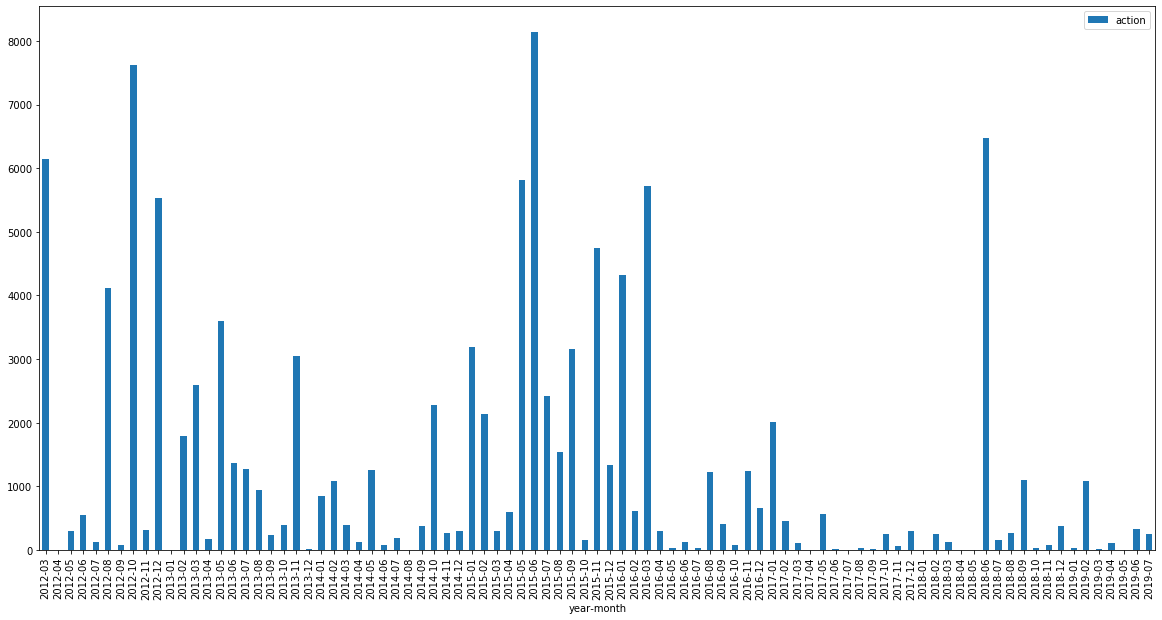

In [310]:
result_with_missing_months.plot.bar(figsize=(20,10))

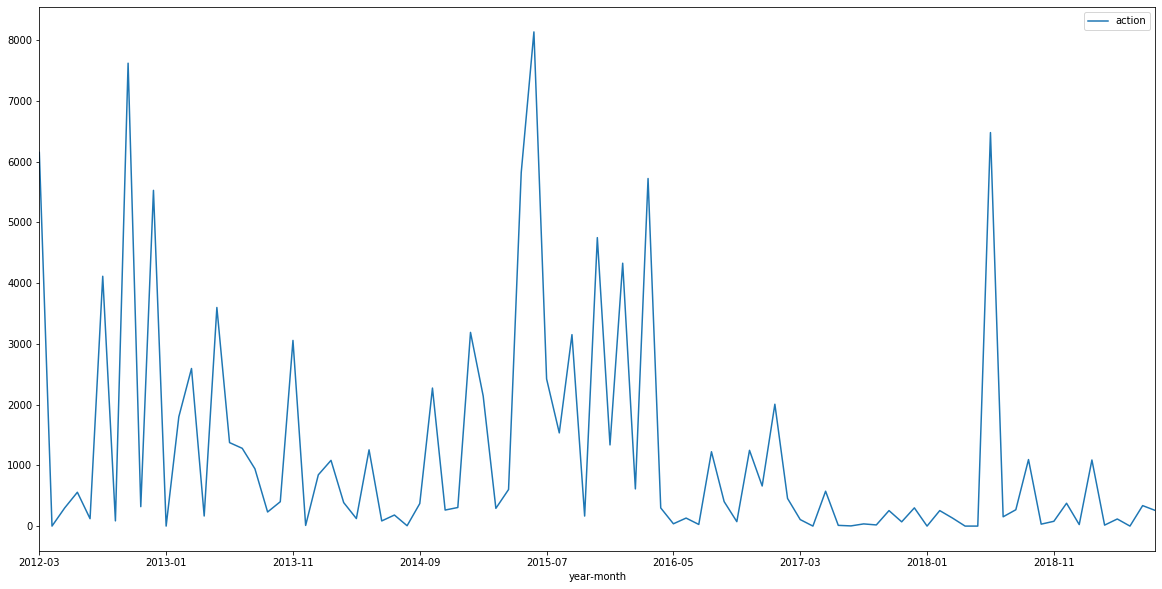

In [192]:
result_with_missing_months.plot.line(figsize=(20,10))

## Plot actions considering change types and stacking them per month

In [323]:
def plot_actions_stacked(changes_per_commit, date_range):
    prev_counts = None
    for action_type in ['INS', 'DEL', 'MOV', 'UPD']:
#        print(action_type)
        changes = changes_per_commit[changes_per_commit['action'] == action_type]
        counts = changes.groupby(['year-month']).agg({'action' : 'count' })
        counts_with_missing_months = add_empty_months(counts, date_range)
        if (prev_counts is None):
           # print("1")
            plot = plt.bar(counts_with_missing_months.index, counts_with_missing_months['action'])
        else:
          #  print("stack")
            plot = plt.bar(counts_with_missing_months.index, counts_with_missing_months['action'], bottom=prev_counts['action'])
        prev_counts = counts_with_missing_months
    
    plt.xticks(prev_counts.index, rotation='vertical')
    plt.legend(['INS', 'DEL', 'MOV', 'UPD'])
    plt.show()

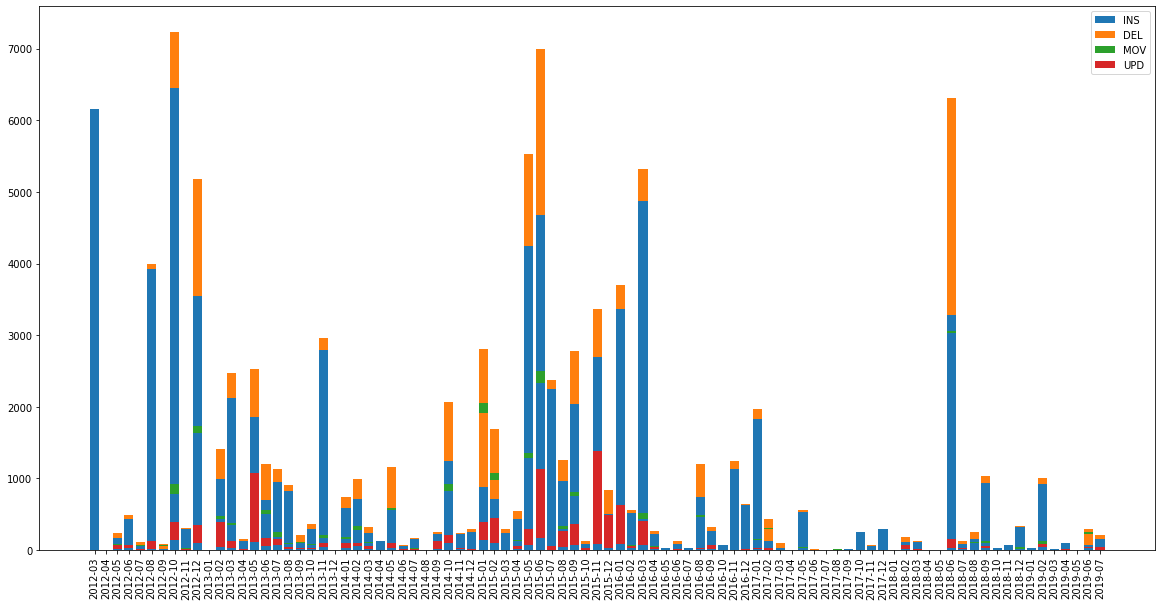

In [324]:
plot_actions_stacked(changes_per_commit, date_range)

In [297]:
#plt.stackplot(inserts_with_missing_months.index, inserts_with_missing_months['action'], deletes_with_missing_months['action'])